<a href="https://colab.research.google.com/github/TmTrojcak/Computational_Physics/blob/main/Star_Spectra_%26_Blackbody.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective:
Estimate the temperature of the blackbody curve that best “fits” the optical spectra of two different stars.

## Instructions:
You need to access two files for this assignment: star1.txt  and star2.txt Download star2.txt Each file has two columns: wavelength in Angstroms in the first column; and relative flux (intensity or brightness) in the second column.

Your assignment is to generate one plot which shows the two stellar spectra (with suitably labeled axes) and a blackbody curve for each star whose temperature best matches (by eye) the shape of each stellar spectrum. (Hint: all we care about is the shape; the normalization does not matter!)

The figure should also include a legend indicating the “best-fit” temperature corresponding to each star.

If you want to use a self-made blackbody function (rather than astropy), here is the code to do that:



  ## def blackbody(wavelength, T):
    """ enter wavelength in meters (can be an array) and temp in Kelvin """
    from astropy import constants as c
    from astropy import units as u

    # add units to temp in K
    T = T*u.K
    # add units to wavelength
    wavelength = wavelength*u.m
    c1 = 2*c.h*c.c**2
    c2 = np.power(wavelength,-5)
    c3 = c.h*c.c/(wavelength*c.k_B*T)
    bb = c1*c2/(np.exp(c3)-1)
    return bb


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy import units as u

In [94]:
def blackbody(wavelength, T):
    """ enter wavelength in meters (can be an array) and temp in Kelvin """
    # add units to temp in K
    T = T*u.K
    # add units to wavelength
    wavelength = wavelength*u.m
    c1 = 2*c.h*c.c**2
    c2 = np.power(wavelength,-5)
    c3 = (c.h*c.c/(wavelength*c.k_B*T)).value
    bb = c1*c2/(np.exp(c3)-1)
    return bb

In [75]:
# Load data for both stars
star2_data = np.loadtxt("/star2.txt")

In [76]:
# Extract wavelength (in Angstroms) and flux
wavelength2, flux2 = star2_data[:, 0] * 1e-10, star2_data[:, 1]
wavelength2, flux2

(array([2.505e-07, 2.510e-07, 2.515e-07, ..., 9.985e-07, 9.990e-07,
        9.995e-07]),
 array([3.6355  , 3.586   , 3.61036 , ..., 0.15637 , 0.155435, 0.155354]))

In [122]:
# Define best-fit temperature (adjust based on visual fit)
T2 = 14000 * u.K  # Example value, tweak as needed
T2

<Quantity 14000. K>

In [123]:
# Generate blackbody curve
bb_flux2 = blackbody(wavelength2, T2)

# Normalize blackbody curve to match the data for shape comparison
bb_flux2 /= np.max(bb_flux2)
flux2 /= np.max(flux2)

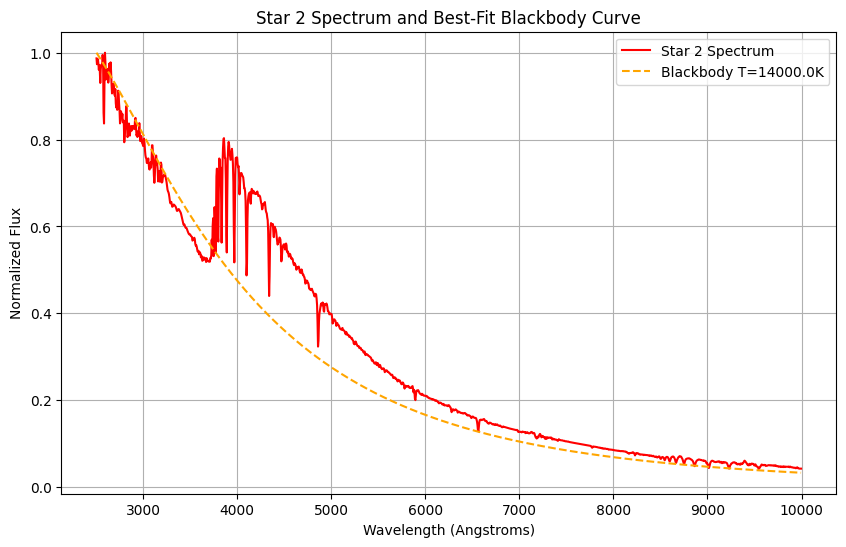

In [125]:
# Plot the spectrum and blackbody curve
plt.figure(figsize=(10, 6))
plt.plot(wavelength2 * 1e10, flux2, label="Star 2 Spectrum", color='red')
plt.plot(wavelength2 * 1e10, bb_flux2, linestyle='--', label=f"Blackbody T={T2.value}K", color='orange')

# Labels and legend
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Normalized Flux")
plt.title("Star 2 Spectrum and Best-Fit Blackbody Curve")
plt.legend()
plt.grid()
plt.show()

# *** Star 1 did not have a Downloadable File ***